# Ramen_Ratings_Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommend">Recommendation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Big List is a list of reviews for ramen products across different brands and countries. The dataset can be found on THE RAMEN RATER website. The dataset contains 4120 rows of reviewed Ramen products across 7 different properties(columns) which are Review #,Brand,Variety,Style,Country,Stars,T. Some background: these reviews are based on the personal preferences of the owner of The Ramen Rater, not on sales of popularity. Scores are in .25 increments – rounding is NOT recommended. Think of letter grading; a 3.5 score out of 5 stars – (3.5 * 2) * 10 = 70 = C. So, rounding a 3.5 to a 4.0 doesn’t reflect it correctly. The dataset contains 4120 rows and 7 columns.

### Question(s) for Analysis
> - What ramen Style is the most common?
- What Country has the most ramen products?
- Which brand is the most common?
- What is the average star ratings for each ramen style?
- What country has the highest rating for ramen products?
- What Ramen Brands have the highest average stars?
- Do ramen products with Spicy flavor have higher star ratings on average?
- Do ramen products with Chicken flavor have higher star ratings on average?
- Do ramen products with Seafood flavor have higher star ratings on average?
- What is the average star ratings by ramen flavor?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
ramen_df = pd.read_csv('ramen_ratings.csv')
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [3]:
ramen_df.shape

(4120, 7)

In [4]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4120 non-null   int64  
 1   Brand     4120 non-null   object 
 2   Variety   4120 non-null   object 
 3   Style     4120 non-null   object 
 4   Country   4120 non-null   object 
 5   Stars     4120 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 225.4+ KB


In [5]:
ramen_df.describe()

,Review #,T
count,4120.000000,0.0
mean,2060.500000,NaN
std,1189.485883,NaN
min,1.000000,NaN
25%,1030.750000,NaN
50%,2060.500000,NaN
75%,3090.250000,NaN
max,4120.000000,NaN


### Assessing Data
- Incorrect values in the stars column: NR: 3, Unrated: 3, 4.25/5: 2, 3.5/2.5: 1, 4.5/5: 1, 42860: 1, 42859: 1, 42829: 1, NS: 1, 5/2.5: 1.
- Wrong datatypes for the Stars column.
- More than one spelling of or way of referring to certain countries : 'USA'/United States, 'Phlippines'/Philippines, 'Souh Korea'/South Korea, 'Russian Federation'/Russia, 'UK'/United Kingdom
- Irrelevant columns : Review # and the empty T column.

In [6]:
ramen_df.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars        object
T           float64
dtype: object

In [7]:
ramen_df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           4120
dtype: int64

In [8]:
ramen_df.Style.value_counts()

Pack          2270
Bowl           797
Cup            787
Tray           182
Box             78
Restaurant       3
Can              1
Bottle           1
Bar              1
Name: Style, dtype: int64

In [9]:
ramen_df.Country.value_counts()

Japan                 800
United States         570
South Korea           429
Taiwan                405
China                 286
Thailand              233
Malaysia              226
Hong Kong             205
Indonesia             175
Singapore             144
Vietnam               129
UK                     76
Canada                 56
Philippines            53
India                  46
Germany                38
Mexico                 32
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Pakistan               13
Bangladesh             12
Hungary                 9
Colombia                6
Poland                  6
France                  6
Russia                  5
Serbia                  5
Cambodia                5
Sarawak                 5
Peru                    4
Ireland                 4
Holland                 4
Italy                   4
Fiji                    4
Spain                   3
Dubai       

In [10]:
ramen_df.Stars.nunique()

49

In [11]:
ramen_df['Review #'].unique()

array([4120, 4119, 4118, ...,    3,    2,    1], dtype=int64)

In [12]:
ramen_df.sample(20)

,Review #,Brand,Variety,Style,Country,Stars,T
3350,770,Kailo,Chicken,Pack,Hong Kong,3.5,NaN
3759,361,Tayho,Vermicelli With Pork,Bowl,United States,1.25,NaN
1522,2598,Myojo,Western Style Kisune Udon,Bowl,Japan,4,NaN
1157,2963,Kiki,Noodles Mixed With Young Vinegar,Pack,Taiwan,5,NaN
1384,2736,Kaset,Instant Vermicelli Spicy Seafood Salad Flavour,Cup,Thailand,3.75,NaN
1327,2793,Mike's Mighty Good Craft Ramen,Chicken Flavor Ramen Soup,Cup,United States,3.75,NaN
2680,1440,Wu-Mu,Dried Noodle With Beef Flavor Sauce,Pack,Taiwan,3,NaN
2545,1575,Paldo,Jjajangmen Chajang Noodle King Bowl,Bowl,South Korea,5,NaN
2280,1840,Forest Noodles,Sweet Potato Noodles With Sesame Paste Sauce,Pack,Taiwan,3.25,NaN
433,3687,Tokyo Ramen,Shoyu Flavor,Pack,Japan,4.5,NaN


In [13]:
sum(ramen_df.duplicated())

0

In [14]:
ramen_df.Stars.value_counts()

5          774
3.5        609
3.75       583
4          484
4.5        283
3.25       236
4.25       225
3          191
2.75       118
2          103
4.75       103
2.5        102
1.5         55
1           44
0           44
1.75        33
2.25        32
0.5         24
0.25        21
1.25        16
Unrated      3
NR           3
4.125        2
2.8          2
4.25/5       2
2.9          2
1.1          2
3.1          2
0.75         2
NS           1
3.125        1
1.8          1
0.9          1
3.7          1
2.125        1
3.5/2.5      1
2.3          1
2.85         1
3.4          1
3.2          1
5/2.5        1
42859        1
3.65         1
0.1          1
4.5/5        1
2.1          1
42829        1
42860        1
3.6          1
Name: Stars, dtype: int64

### Data Cleaning

#### Issue 1: Incorrect values in the stars column: NR: 3, Unrated: 3, 4.25/5: 2, 3.5/2.5: 1, 4.5/5: 1, 42860: 1, 42859: 1, 42829: 1, NS: 1, 5/2.5: 1.
Define: Change the three records with Unrated, NR and NS to 0, then replace ratings having ratio to the numerator or denominator value.

Code

In [15]:
ramen_df['Stars'] = ramen_df['Stars'].str.replace('Unrated', '0')

In [16]:
ramen_df['Stars'] = ramen_df['Stars'].str.replace('NR', '0')
ramen_df['Stars'] = ramen_df['Stars'].str.replace('NS', '0')
ramen_df['Stars'] = ramen_df['Stars'].str.replace('4.25/5', '4.25')
ramen_df['Stars'] = ramen_df['Stars'].str.replace('3.5/2.5', '3.5')
ramen_df['Stars'] = ramen_df['Stars'].str.replace('4.5/5', '4.5')
ramen_df['Stars'] = ramen_df['Stars'].str.replace('5/2.5', '2.5')

In [17]:
drop_rows = ['42860', '42859', '42829']
wrong_ratings = ramen_df[ramen_df['Stars'].isin(drop_rows)]
idx = list(wrong_ratings.index)
ramen_df = ramen_df.drop(idx)

Test

In [18]:
ramen_df.Stars.value_counts()

5        774
3.5      610
3.75     583
4        484
4.5      284
3.25     236
4.25     227
3        191
2.75     118
2        103
4.75     103
2.5      103
1.5       55
0         51
1         44
1.75      33
2.25      32
0.5       24
0.25      21
1.25      16
2.8        2
1.1        2
3.1        2
2.9        2
4.125      2
0.75       2
3.2        1
2.3        1
2.1        1
0.1        1
3.125      1
3.4        1
3.6        1
3.65       1
2.85       1
2.125      1
0.9        1
1.8        1
3.7        1
Name: Stars, dtype: int64

In [19]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4117 non-null   int64  
 1   Brand     4117 non-null   object 
 2   Variety   4117 non-null   object 
 3   Style     4117 non-null   object 
 4   Country   4117 non-null   object 
 5   Stars     4117 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 257.3+ KB


#### Issue 2: Wrong datatypes for the Stars column.
Define: Change the dataype of the stars column to float.

Code

In [20]:
ramen_df['Stars'] = ramen_df['Stars'].astype(float)

Test

In [21]:
ramen_df['Stars'].dtypes

dtype('float64')

In [22]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4117 non-null   int64  
 1   Brand     4117 non-null   object 
 2   Variety   4117 non-null   object 
 3   Style     4117 non-null   object 
 4   Country   4117 non-null   object 
 5   Stars     4117 non-null   float64
 6   T         0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 257.3+ KB


#### Issue 3: More than one spelling of or way of referring to certain countries : 'USA'/United States, 'Phlippines'/Philippines, 'Souh Korea'/South Korea, 'Russian Federation'/Russia, 'UK'/United Kingdom
Define: Replace the wrong spellings with the right one for uniformity.

Code

'USA', 'Phlippines', 'Souh Korea', 'Russian Federation', 'UK'

In [23]:
ramen_df['Country'] = ramen_df['Country'].str.replace('USA', 'United States')
ramen_df['Country'] = ramen_df['Country'].str.replace('Phlippines', 'Philippines')
ramen_df['Country'] = ramen_df['Country'].str.replace('Souh Korea', 'South Korea')
ramen_df['Country'] = ramen_df['Country'].str.replace('Russian Federation', 'Russia')
ramen_df['Country'] = ramen_df['Country'].str.replace('UK', 'United Kingdom')

Test

In [24]:
ramen_df.Country.value_counts()

Japan             800
United States     568
South Korea       430
Taiwan            405
China             286
Thailand          233
Malaysia          226
Hong Kong         205
Indonesia         175
Singapore         144
Vietnam           129
United Kingdom     77
Canada             56
Philippines        54
India              46
Germany            38
Mexico             32
Australia          25
Brazil             24
Netherlands        16
Nepal              14
Myanmar            14
Pakistan           13
Bangladesh         12
Hungary             9
Russia              7
Poland              6
Colombia            6
France              6
Serbia              5
Sarawak             5
Cambodia            5
Holland             4
Fiji                4
Ireland             4
Peru                4
Italy               4
Finland             3
Israel              3
Dubai               3
Spain               3
Ukraine             3
Sweden              3
Nigeria             2
Estonia             2
Ghana     

#### Issue 4: Irrelevant columns : Review # and the empty T column.
Define: Drop irrelevant column: Review # and T.

Code

In [25]:
ramen_df.drop('Review #', axis = 1, inplace = True)

In [26]:
ramen_df.drop('T', axis = 1, inplace = True)

Test

In [27]:
ramen_df.columns

Index(['Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

In [28]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    4117 non-null   object 
 1   Variety  4117 non-null   object 
 2   Style    4117 non-null   object 
 3   Country  4117 non-null   object 
 4   Stars    4117 non-null   float64
dtypes: float64(1), object(4)
memory usage: 193.0+ KB


In [29]:
ramen_df.head()

,Brand,Variety,Style,Country,Stars
0,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3.00
1,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.50
2,Binh Tay,Mi Kiwi,Bowl,Vietnam,3.00
3,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.50
4,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75


In [30]:
ramen_df.describe()

,Stars
count,4117.000000
mean,3.726779
std,1.053681
min,0.000000
25%,3.250000
50%,3.750000
75%,4.500000
max,5.000000


In [31]:
ramen_df.shape

(4117, 5)

In [32]:
ramen_df.to_csv('ramen_cleaned', index = False)

### What is the structure of the dataset?

> The dataset contains 4120 rows and 7 columns. After cleaning, two irrelevant columns (Review # and T) were dropped and three rows were dropped as they had incorrect star ratings. The cleaned dataset now has 4117 rows and 5 columns.

### What is/are the main feature(s) of interest in the dataset?

> I am most interested in finding out what features influence the star ratings of a ramen.

### What features in the dataset do I think will help support the investigation into the feature(s) of interest?

> I expect that ramen style will have the most effect on star ratings. I also think that the country where a ramen is produced can affect the star ratings because of a possible bias for asian countries. I think that brand may also affect the star ratings as well.

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Exploration

#### What is the distribution of the ramen stars rating?

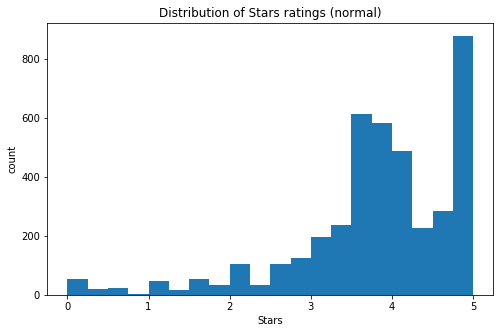

In [33]:
bins = np.arange(0, ramen_df['Stars'].max()+0.25, 0.25)

plt.figure(figsize=[8, 5])
plt.hist(data = ramen_df, x = 'Stars', bins = bins)
plt.xlabel('Stars')
plt.ylabel('count');
plt.title('Distribution of Stars ratings (normal)');

I was expecting a bell shaped distribution, but the histogram shows a left skewed distribution. Let's find out what a log transformation to the Stars column will do to the distribution.

In [34]:
np.log10(ramen_df['Stars']).describe()

C:\Users\Gladens\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4117.000000
mean            -inf
std              NaN
min             -inf
25%         0.511883
50%         0.574031
75%         0.653213
max         0.698970
Name: Stars, dtype: float64

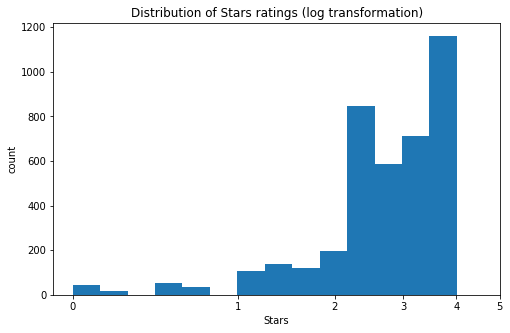

In [35]:
#Applying a log transformation to the Stars rating and visualizing the distribution.
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(ramen_df['Stars'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ramen_df, x = 'Stars', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 2e0, 3e0, 4e0, 5e0, 6e0], [0, 1, 2, 3, 4, 5])
plt.xlabel('Stars')
plt.ylabel('count')
plt.title('Distribution of Stars ratings (log transformation)');
plt.show()

After a log transformation, there is no significant change in the disribution. The stars ratings distribution is still left skewed.

#### What ramen Style is the most common?

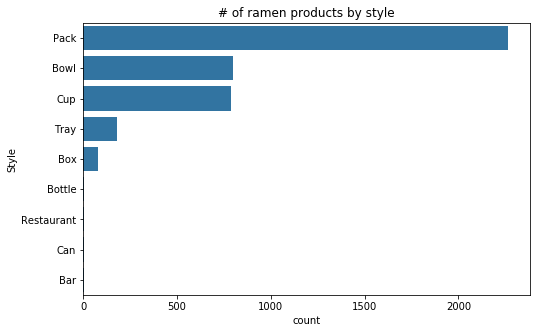

In [36]:
color = sns.color_palette()[0]

plt.figure(figsize=[8, 5])
sns.countplot(data = ramen_df, y = 'Style', color = color);
plt.xlabel('count')
plt.ylabel('Style')
plt.title('# of ramen products by style');

The most common style used by ramen brands is Pack, followed by Bowl and then Cup. Bottle, Restaurant, Can and Bar are the least used styles by ramen brands.

#### What Country has the most ramen products?

In [37]:
order = ramen_df.Country.value_counts()

In [38]:
order.index

Index(['Japan', 'United States', 'South Korea', 'Taiwan', 'China', 'Thailand',
       'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore', 'Vietnam',
       'United Kingdom', 'Canada', 'Philippines', 'India', 'Germany', 'Mexico',
       'Australia', 'Brazil', 'Netherlands', 'Nepal', 'Myanmar', 'Pakistan',
       'Bangladesh', 'Hungary', 'Russia', 'Poland', 'Colombia', 'France',
       'Serbia', 'Sarawak', 'Cambodia', 'Holland', 'Fiji', 'Ireland', 'Peru',
       'Italy', 'Finland', 'Israel', 'Dubai', 'Spain', 'Ukraine', 'Sweden',
       'Nigeria', 'Estonia', 'Ghana', 'New Zealand', 'Portugal'],
      dtype='object')

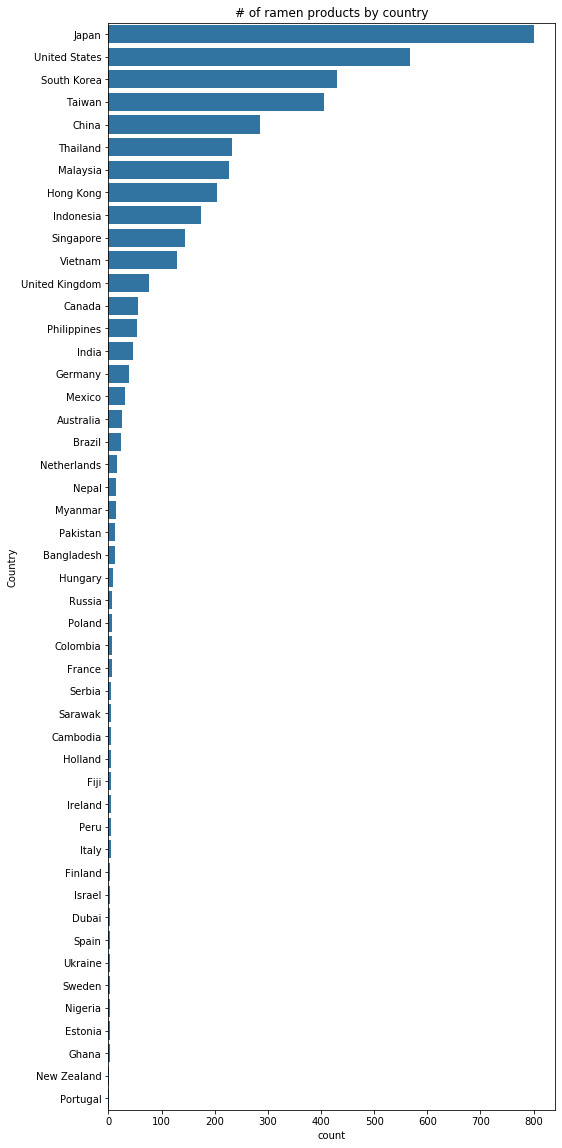

In [39]:
plt.figure(figsize=[8, 20])
sns.countplot(data = ramen_df, y = 'Country', color = color, order = order.index);
plt.xlabel('count')
plt.ylabel('Country')
plt.title('# of ramen products by country');

Japan has the highest total number of ramen_brands, followed by United States and then South Korea. 

#### Which brand is the most common?

In [40]:
brand_order = ramen_df.Brand.value_counts()
top_brands_by_count = list(brand_order.index[:20])

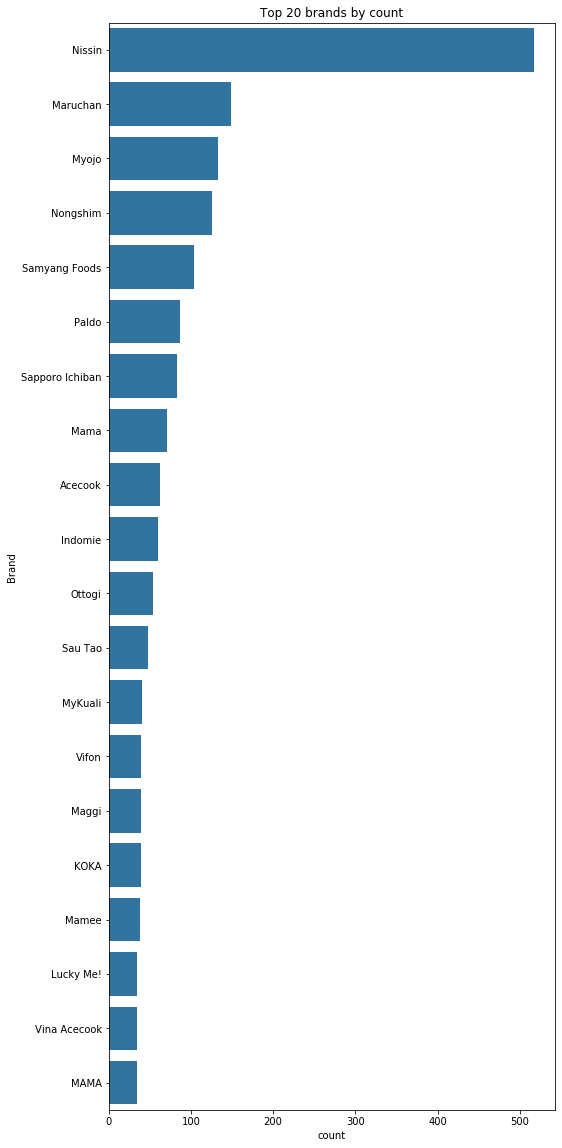

In [41]:
#Visualizing the top 20 brands by counts as the number of brand is too much to be visualized.
top_brands_df = ramen_df[ramen_df.Brand.isin(top_brands_by_count)]

plt.figure(figsize=[8, 20])
order = top_brands_df.Brand.value_counts()
sns.countplot(data = top_brands_df, y = 'Brand', color = color, order = order.index);
plt.xlabel('count')
plt.ylabel('Brand')
plt.title('Top 20 brands by count');

The most common brand is Nissan followed by Maruchan and then Myojo.

### Bivariate Exploration

#### What is the average star ratings for each ramen style?

In [42]:
avg_stars_by_style = ramen_df.groupby('Style')['Stars'].mean()
avg_stars_by_style

Style
Bar           5.000000
Bottle        4.000000
Bowl          3.738708
Box           4.262821
Can           3.500000
Cup           3.493170
Pack          3.797265
Restaurant    3.583333
Tray          3.572115
Name: Stars, dtype: float64

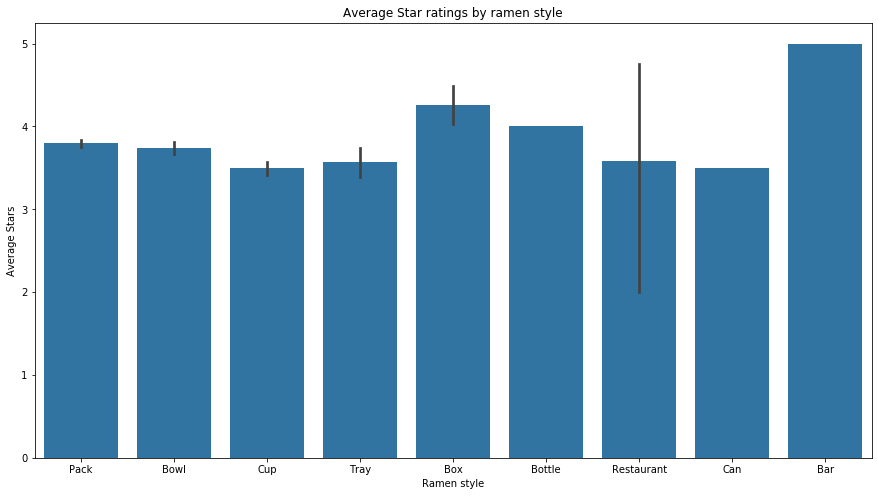

In [43]:
plt.figure(figsize = [15, 8])
sns.barplot(data = ramen_df, x = 'Style', y = 'Stars', color = color)
plt.ylabel('Average Stars')
plt.xlabel('Ramen style')
plt.title('Average Star ratings by ramen style');

In [44]:
print(ramen_df[ramen_df.Style == 'Bottle'])
print("-----------------")
print(ramen_df[ramen_df.Style == 'Can'])
print("-----------------")
print(ramen_df[ramen_df.Style == 'Bar'])

      Brand                   Variety   Style        Country  Stars
149  Yamasa  Artisanal Tonkotsu Broth  Bottle  United States    4.0
-----------------
         Brand                                         Variety Style  \
1607  Pringles  Nissin Top Ramen Chicken Flavor Potato Crisps    Can   

            Country  Stars  
1607  United States    3.5  
-----------------
                     Brand        Variety Style        Country  Stars
2965  Komforte Chockolates  Savory Ramen    Bar  United States    5.0


Ramen product with the style Bar has the highest star ratings on average but this is because only one ramen product record has the style Bar and it had a star rating of 5.0! Also Can and Bottle ramen styles both have a average star ratings of 3.5 and 4.0 respectively because there is only one ramen product record for each style. The ramen products with the style Box have the second highest star ratings on average of 4.262821. Ramen products with the Cup style have the lowest star ratings on average.

#### What country has the highest rating for ramen products?

In [45]:
avg_stars_by_country = ramen_df.groupby('Country')['Stars'].mean()
avg_stars_by_country

Country
Australia         3.260000
Bangladesh        3.479167
Brazil            3.645833
Cambodia          4.200000
Canada            2.330357
China             3.563112
Colombia          3.291667
Dubai             3.583333
Estonia           3.500000
Fiji              3.875000
Finland           3.583333
France            4.333333
Germany           3.532895
Ghana             3.500000
Holland           3.562500
Hong Kong         3.875610
Hungary           3.611111
India             3.456522
Indonesia         4.122857
Ireland           1.500000
Israel            3.000000
Italy             2.750000
Japan             3.862031
Malaysia          4.187611
Mexico            3.609375
Myanmar           3.946429
Nepal             3.517857
Netherlands       2.500000
New Zealand       3.000000
Nigeria           2.375000
Pakistan          3.192308
Peru              3.375000
Philippines       3.407407
Poland            3.083333
Portugal          2.000000
Russia            3.571429
Sarawak           4.

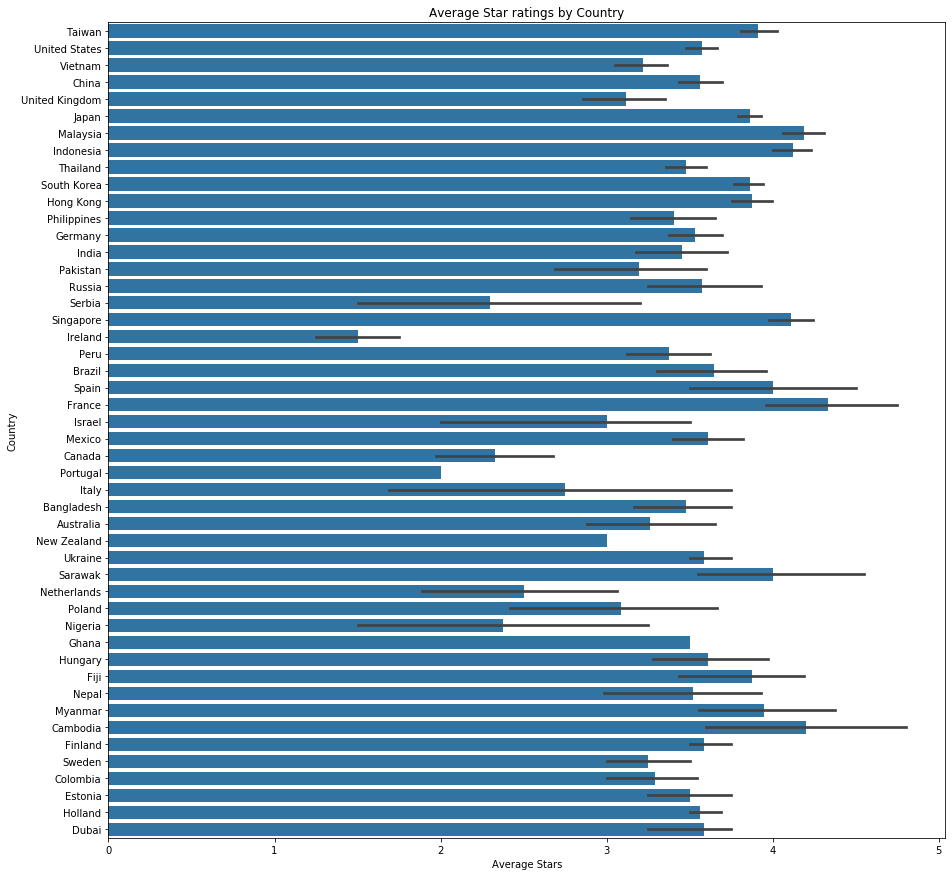

In [46]:
plt.figure(figsize = [15, 15])
sns.barplot(data = ramen_df, y = 'Country', x = 'Stars', color = color)
plt.xlabel('Average Stars')
plt.ylabel('Country')
plt.title('Average Star ratings by Country');

France has the highest average rating for ramen products while Ireland has the lowest average rating. We must note that some countries have only one recored ramen product, so their average rating score may not be useful for analysis. These countries are Portugal, New Zealand and Ghana.

#### What Ramen Brands have the highest average stars?

In [47]:
avg_stars_by_brand = ramen_df.groupby('Brand')['Stars'].mean()
avg_stars_by_brand.sort_values(ascending = False)[:67]

Brand
Nishiyama Seimen          5.000000
Fukumen                   5.000000
Mr. Lee's                 5.000000
Super God                 5.000000
Himawari-Shokuhin         5.000000
                            ...   
Chef Nic's Noodles        5.000000
Neo~Essence               5.000000
Chillies Brand            5.000000
Chil Kab Farm Products    5.000000
Prima Taste               4.961538
Name: Stars, Length: 67, dtype: float64

In [48]:
avg_stars_by_brand.sort_values(ascending = True)[:20]

Brand
US Canning                            0.000
Yibin                                 0.000
Dr. McDougall's                       0.000
Isoyama Shoji                         0.000
Kim Ve Wong                           0.000
Nanoblock                             0.000
Simply Asia                           0.000
Fairy Bridge                          0.000
One Dish Asia                         0.000
Tiger                                 0.000
Hikari Miso                           0.000
Base Foods                            0.000
Hsin Tung Yang                        0.000
Bowlfull                              0.000
Roland                                0.125
Crystal Noodle                        0.250
Chongqing Suanlabao Food Co., Ltd.    0.250
Mitoku                                0.250
Nan Hsing                             0.250
Unif Tung-I                           0.500
Name: Stars, dtype: float64

66 different Brands have average star ratings of 5.0. The next Brand with the closest average star rating to 5.0 is Prima Taste Brand with average star rating of 4.961538. The Brands US Canning, Yibin, Dr. McDougall's, Isoyama Shoji, Kim Ve Wong, Nanoblock, Simply Asia, Fairy Bridge, One Dish Asia, Tiger, Hikari Miso, Base Foods, Hsin Tung Yang, and Bowlfull all have the lowest average star ratings of 0.0. The next Brand with the closest average star rating to 0.0 is Roland Brand with average star rating of 0.125000.

### Feature Engineering
For deeper analysis and insights.

#### Spicy Ramen Products
Ramen products with any of ['Hot Sauce', 'Spicy', 'Pepper', 'Hot', 'Chili'] in the Variety column.

In [49]:
ramen_df['Spicy'] = np.where(ramen_df['Variety'].str.contains('Spicy|Hot|Pepper|Chili'), 'Spicy', 'Not Spicy')

673
3444


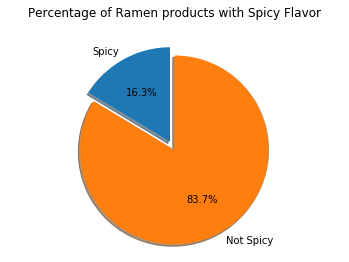

In [50]:
labels = 'Spicy', 'Not Spicy'
spicy_size = 0
not_spicy_size = 0
for i in ramen_df['Spicy']:
    if i == 'Spicy':
        spicy_size += 1
    else:
        not_spicy_size +=1
print(spicy_size)
print(not_spicy_size)
sizes = [(spicy_size / len(ramen_df)) * 100, (not_spicy_size / len(ramen_df)) * 100]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Ramen products with Spicy Flavor\n')

plt.show()

The Percentage of Ramen products with Spicy Flavor is 16.3%(673 spicy ramen products 0f 4117 total ramen products).

#### Chicken Flavored Ramen Products

In [51]:
ramen_df['Chicken_Flavor'] = np.where(ramen_df['Variety'].str.contains('Chicken|Chikin'), 'Chicken', 'Not Chicken')

484
3633


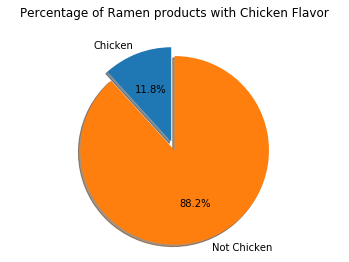

In [52]:
labels = 'Chicken', 'Not Chicken'
chicken_size = 0
not_chicken_size = 0
for i in ramen_df['Chicken_Flavor']:
    if i == 'Chicken':
        chicken_size += 1
    else:
        not_chicken_size +=1
print(chicken_size)
print(not_chicken_size)
sizes = [(chicken_size / len(ramen_df)) * 100, (not_chicken_size / len(ramen_df)) * 100]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Ramen products with Chicken Flavor\n')

plt.show()

The Percentage of Ramen products with Spicy Flavor is 11.8%(484 chicken ramen products 0f 4117 total ramen products).

#### Seafood Flavored Ramen Products

In [53]:
ramen_df['Seafood'] = np.where(ramen_df['Variety'].str.contains('Seafood'), 'Seafood', 'Not Seafood')

151
3966


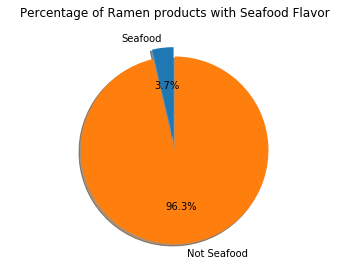

In [54]:
labels = 'Seafood', 'Not Seafood'
seafood_size = 0
not_seafood_size = 0
for i in ramen_df['Seafood']:
    if i == 'Seafood':
        seafood_size += 1
    else:
        not_seafood_size +=1
print(seafood_size)
print(not_seafood_size)
sizes = [(seafood_size / len(ramen_df)) * 100, (not_seafood_size / len(ramen_df)) * 100]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Ramen products with Seafood Flavor\n')

plt.show()

The Percentage of Ramen products with Spicy Flavor is 3.7%(151 seafood ramen products 0f 4117 total ramen products).

### Further Analysis
#### Do ramen products with Spicy flavor have higher star ratings on average?

In [55]:
avg_stars_by_spice = ramen_df.groupby('Spicy')['Stars'].mean()
avg_stars_by_spice

Spicy
Not Spicy    3.723802
Spicy        3.742013
Name: Stars, dtype: float64

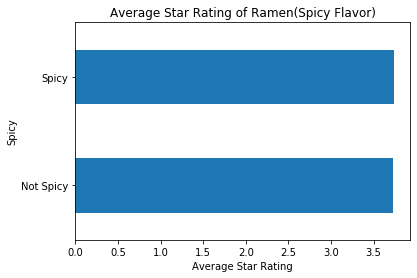

In [56]:
avg_stars_by_spice.plot(kind= 'barh')
plt.xlabel('Average Star Rating')
plt.title('Average Star Rating of Ramen(Spicy Flavor)');

Ramen products with spicy flavor have higher star ratings on average. The difference between the average star ratings of ramen products with spicy flavor and those without it is 0.018.

#### Do ramen products with Chicken flavor have higher star ratings on average?

In [57]:
avg_stars_by_chicken_flavor = ramen_df.groupby('Chicken_Flavor')['Stars'].mean()
avg_stars_by_chicken_flavor

Chicken_Flavor
Chicken        3.524122
Not Chicken    3.753778
Name: Stars, dtype: float64

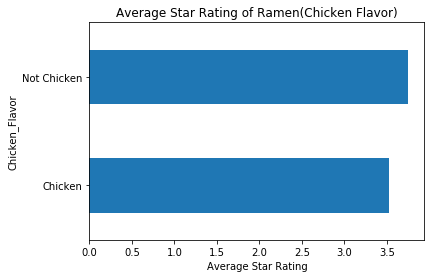

In [58]:
avg_stars_by_chicken_flavor.plot(kind= 'barh')
plt.xlabel('Average Star Rating')
plt.title('Average Star Rating of Ramen(Chicken Flavor)');

Ramen products with chicken flavor have lower average star ratings than those without chicken flavor. The average star ratings of ramen products without chicken flavor is greater than those with chicken flavor by 0.23.

#### Do ramen products with Seafood flavor have higher star ratings on average?

In [59]:
avg_stars_by_seafood = ramen_df.groupby('Seafood')['Stars'].mean()
avg_stars_by_seafood

Seafood
Not Seafood    3.722806
Seafood        3.831126
Name: Stars, dtype: float64

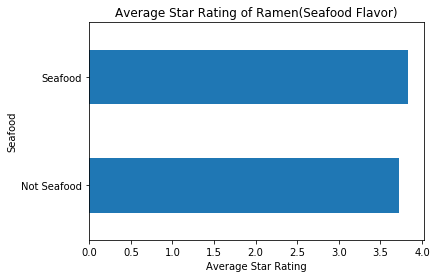

In [60]:
avg_stars_by_seafood.plot(kind= 'barh')
plt.xlabel('Average Star Rating')
plt.title('Average Star Rating of Ramen(Seafood Flavor)');

Ramen products with seafood flavor have higher star ratings average. The difference between the average star ratings of ramen products with seafood flavor and those without it is 0.11.

### Combine the three columns spice, chicken and seafood into one column called flavor.

In [61]:
ramen_df['Spicy'].replace('Not Spicy', np.nan, inplace = True)
ramen_df['Chicken_Flavor'].replace('Not Chicken', np.nan, inplace = True)
ramen_df['Seafood'].replace('Not Seafood', np.nan, inplace = True)

In [62]:
ramen_df['Flavor'] = ramen_df[['Spicy', 'Chicken_Flavor', 'Seafood']].apply(lambda x: ','.join(x[x.notnull()]), axis = 1)

In [63]:
ramen_df.head()

,Brand,Variety,Style,Country,Stars,Spicy,Chicken_Flavor,Seafood,Flavor
0,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3.00,NaN,NaN,NaN,
1,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.50,NaN,NaN,NaN,
2,Binh Tay,Mi Kiwi,Bowl,Vietnam,3.00,NaN,NaN,NaN,
3,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.50,NaN,Chicken,NaN,Chicken
4,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN,NaN,NaN,


In [64]:
ramen_df['Flavor'].value_counts()

                 2920
Spicy             562
Chicken           412
Seafood           112
Spicy,Chicken      72
Spicy,Seafood      39
Name: Flavor, dtype: int64

#### What is the average star ratings by ramen flavor?

In [65]:
avg_stars_by_flavor = ramen_df.groupby('Flavor')['Stars'].mean()
avg_stars_by_flavor

Flavor
                 3.752560
Chicken          3.505583
Seafood          3.776786
Spicy            3.739324
Spicy,Chicken    3.630208
Spicy,Seafood    3.987179
Name: Stars, dtype: float64

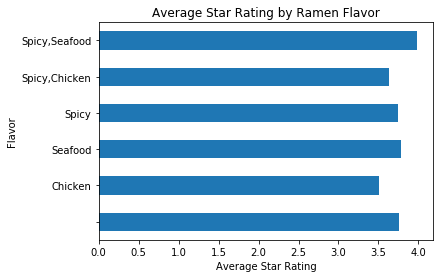

In [66]:
avg_stars_by_flavor.plot(kind= 'barh')
plt.xlabel('Average Star Rating')
plt.title('Average Star Rating by Ramen Flavor');

Ramen products with Spicy,Seafood flavor have the highest average star ratings of 3.987179 followed by those with Seafood flavor with average star rating of 3.776786. Ramen products with Chicken flavor have the least average star ratings of 3.505583. Those with Spicy,Chicken flavor have average star ratings of 3.630208. It can be seen that products containing chicken flavor generally have lower star ratings. 

### Multivariate Exploration

#### Average Star ratings by Style and Flavor

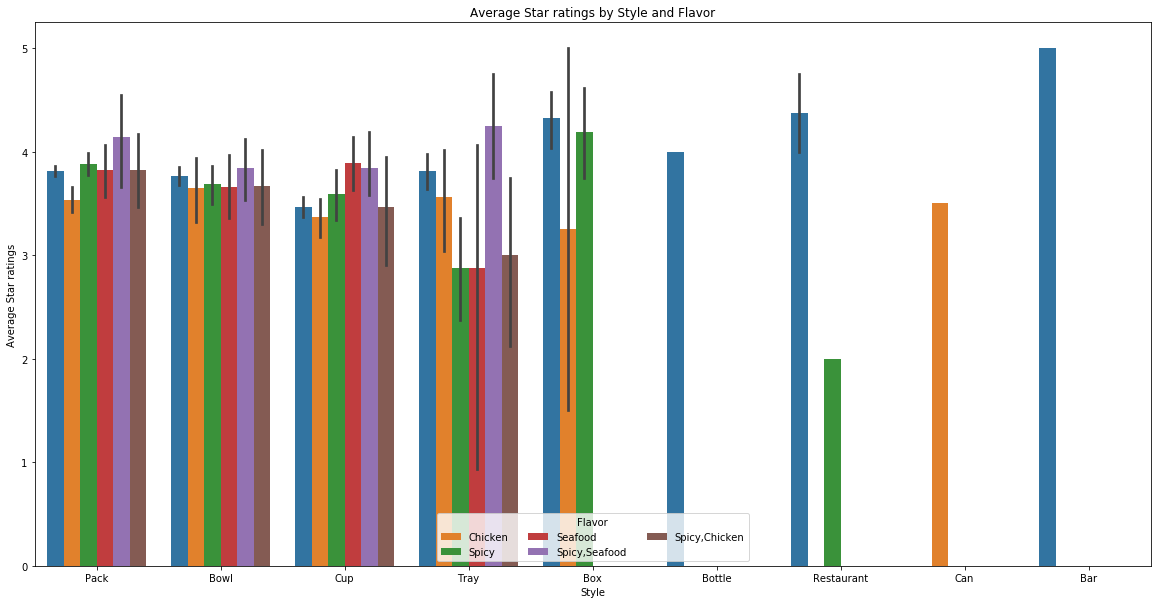

In [67]:
plt.figure(figsize = [20, 10])

sns.barplot(data = ramen_df, x = 'Style', y = 'Stars', 
              hue = 'Flavor');
plt.legend(loc = 8, ncol = 3, title = 'Flavor');
plt.ylabel('Average Star ratings')
plt.xlabel('Style')
plt.title('Average Star ratings by Style and Flavor');

NB: The Blue colored bars represent the Ramen products without any of the feature engineered flavors. The above barplot shows how Ramen products with Spicy,Seafood flavor have better average star ratings across the Ramen styles (Pack, Bowl, Cup and Tray) followed by Seafood flavored Ramen products and then Spicy flavored Ramen products.

<a id='conclusions'></a>
## Conclusions
1. The distributon of the Star ratings is skewed to the left.
2. The most common style used by ramen brands is Pack, followed by Bowl and then Cup. Bottle, Restaurant, Can and Bar are the least used styles by ramen brands.
3. Japan has the highest total number of ramen_brands. 
4. The most common brand is Nissan.
5. Ramen product with the style Bar has the highest star ratings on average but this is because only one ramen product record has the style Bar and it had a star rating of 5.0! Also Can and Bottle ramen styles both have a average star ratings of 3.5 and 4.0 respectively because there is only one ramen product record for each style. The ramen products with the style Box have the second highest star ratings on average of 4.262821. Ramen products with the Cup style have the lowest star ratings on average.
6. France has the highest average rating for ramen products while Ireland has the lowest average rating. We must note that some countries have only one recored ramen product. These countries are Portugal, New Zealand and Ghana.
7. 66 different Brands have average star ratings of 5.0. The next Brand with the closest average star rating to 5.0 is Prima Taste Brand with average star rating of 4.961538. The Brands US Canning, Yibin, Dr. McDougall's, Isoyama Shoji, Kim Ve Wong, Nanoblock, Simply Asia, Fairy Bridge, One Dish Asia, Tiger, Hikari Miso, Base Foods, Hsin Tung Yang, and Bowlfull all have the lowest average star ratings of 0.0. The next Brand with the closest average star rating to 0.0 is Roland Brand with average star rating of 0.125000.
8. The Percentage of Ramen products with Spicy Flavor is 16.3%(673 spicy ramen products 0f 4117 total ramen products).
9. The Percentage of Ramen products with Spicy Flavor is 11.8%(484 chicken ramen products 0f 4117 total ramen products).
10. The Percentage of Ramen products with Spicy Flavor is 3.7%(151 seafood ramen products 0f 4117 total ramen products).
11. Ramen products with spicy flavor have higher star ratings on average. The difference between the average star ratings of ramen products with spicy flavor and those without it is 0.018.
12. Ramen products with chicken flavor have lower average star ratings than those without chicken flavor. The average star ratings of ramen products without chicken flavor is greater than those with chicken flavor by 0.23.
13. Ramen products with seafood flavor have higher star ratings average. The difference between the average star ratings of ramen products with seafood flavor and those without it is 0.11.
14. Ramen products with Spicy,Seafood flavor have the highest average star ratings of 3.987179 followed by those with Seafood flavor with average star rating of 3.776786. Ramen products with Chicken flavor have the least average star ratings of 3.505583. Those with Spicy,Chicken flavor have average star ratings of 3.630208. It can be seen that products containing chicken flavor generally have lower star ratings.

<a id='recommend'></a>
## Limitations & Recommendation
More feature engineering to get more flavors for the remaining ramen products will help to drive deeper analysis and get more insights.